In [1]:
import pandas as pd
import numpy as np 
from collections import Counter as c 
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder 
import pickle 
import warnings
warnings.filterwarnings('ignore')

## Reading the dataset

In [2]:
data=pd.read_csv(r"chronickidneydisease.csv")   ## Loading the dataset

In [28]:
data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cells,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,3,1,0,1,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,1,0,0,0,0,0
1,7.0,50.0,3,4,0,1,1,0,0,148.036517,...,38.0,6000.0,4.707435,0,0,0,0,0,0,0
2,62.0,80.0,1,2,3,1,1,0,0,423.000000,...,31.0,7500.0,4.707435,0,1,0,1,0,1,0
3,48.0,70.0,0,4,0,1,0,1,0,117.000000,...,32.0,6700.0,3.900000,1,0,0,1,1,1,0
4,51.0,80.0,1,2,0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,0,0,0,0,0,0,0


In [29]:
data.tail()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cells,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
395,55.0,80.0,3,0,0,1,1,0,0,140.0,...,47.0,6700.0,4.9,0,0,0,0,0,0,1
396,42.0,70.0,4,0,0,1,1,0,0,75.0,...,54.0,7800.0,6.2,0,0,0,0,0,0,1
397,12.0,80.0,3,0,0,1,1,0,0,100.0,...,49.0,6600.0,5.4,0,0,0,0,0,0,1
398,17.0,60.0,4,0,0,1,1,0,0,114.0,...,51.0,7200.0,5.9,0,0,0,0,0,0,1
399,58.0,80.0,4,0,0,1,1,0,0,131.0,...,53.0,6800.0,6.1,0,0,0,0,0,0,1


In [30]:
data.shape

(400, 25)

In [31]:
data.duplicated().sum()

0

## Understanding the datatype

In [32]:
data.dtypes

age                        float64
blood_pressure             float64
specific_gravity             int64
albumin                      int64
sugar                        int64
red_blood_cells              int64
pus_cells                    int64
pus_cell_clumps              int64
bacteria                     int64
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume         float64
white_blood_cell_count     float64
red_blood_cell_count       float64
hypertension                 int64
diabetesmellitus             int64
coronary_artery_disease      int64
appetite                     int64
pedal_edema                  int64
anemia                       int64
class                        int64
dtype: object

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    int64  
 3   albumin                  400 non-null    int64  
 4   sugar                    400 non-null    int64  
 5   red_blood_cells          400 non-null    int64  
 6   pus_cells                400 non-null    int64  
 7   pus_cell_clumps          400 non-null    int64  
 8   bacteria                 400 non-null    int64  
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  haemoglobin              4

## Descriptive statistics

In [34]:
data.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cells,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.675000,76.469072,2.542500,0.90000,0.395000,0.882500,0.810000,0.105000,0.055000,148.036517,...,38.884498,8406.122449,4.707435,0.367500,0.34250,0.085000,0.205000,0.190000,0.150000,0.375000
std,17.022008,13.476298,1.086806,1.31313,1.040038,0.322418,0.392792,0.306937,0.228266,74.782634,...,8.151081,2523.219976,0.840314,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519,0.484729
min,2.000000,50.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,9.000000,2200.000000,2.100000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,2.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,101.000000,...,34.000000,6975.000000,4.500000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,78.234536,3.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,126.000000,...,38.884498,8406.122449,4.707435,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,64.000000,80.000000,3.000000,2.00000,0.000000,1.000000,1.000000,0.000000,0.000000,150.000000,...,44.000000,9400.000000,5.100000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,4.000000,5.00000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,54.000000,26400.000000,8.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


## Dropping the column "id"

In [3]:
data.drop(["id"],axis=1,inplace=True)  # dropping the column "id"

In [35]:
data.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cells', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

## Renaming columns

In [4]:
data.columns = ['age','blood_pressure','specific_gravity','albumin','sugar','red_blood_cells','pus_cells',
              'pus_cell_clumps','bacteria','blood_glucose_random','blood_urea','serum_creatinine','sodium','potassium',
              'haemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count','hypertension',
              'diabetesmellitus','coronary_artery_disease','appetite','pedal_edema','anemia','class']
data.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cells', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

## Target column

In [5]:
data['class'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

## Rectifying target column

In [6]:
data['class']=data['class'].replace("ckd\t","ckd")
data['class'].unique()

array(['ckd', 'notckd'], dtype=object)

## Categorical columns


In [7]:
categorical_columns=set(data.dtypes[data.dtypes=='O'].index.values)  #fetching object or categorical columns
print(categorical_columns)

{'pus_cells', 'white_blood_cell_count', 'hypertension', 'coronary_artery_disease', 'red_blood_cell_count', 'red_blood_cells', 'anemia', 'pus_cell_clumps', 'diabetesmellitus', 'appetite', 'pedal_edema', 'class', 'bacteria', 'packed_cell_volume'}


In [ ]:
for i in categorical_columns:
    print("Columns : ",i)
    print(c[data[i]])
    print("*"*120+'\n')

## Removing columns which are not categorical

In [8]:
categorical_columns.remove('red_blood_cell_count')
categorical_columns.remove('packed_cell_volume')
categorical_columns.remove('white_blood_cell_count')
print(categorical_columns)

{'pus_cells', 'hypertension', 'coronary_artery_disease', 'red_blood_cells', 'anemia', 'pus_cell_clumps', 'diabetesmellitus', 'appetite', 'pedal_edema', 'class', 'bacteria'}


## Numerical columns

In [9]:
continuous_columns=set(data.dtypes[data.dtypes!='O'].index.values)    #fetching numerical columns
print(continuous_columns)

{'albumin', 'blood_pressure', 'haemoglobin', 'specific_gravity', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sugar', 'potassium', 'age', 'sodium'}


In [ ]:
for i in continuous_columns:
    print("Columns : ",i)
    print(c[data[i]])
    print("*"*120+'\n')

## Removing columns which are not numerical

In [10]:
continuous_columns.remove('specific_gravity')
continuous_columns.remove('albumin')
continuous_columns.remove('sugar')
print(continuous_columns)

{'blood_pressure', 'haemoglobin', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'potassium', 'age', 'sodium'}


## Adding columns which we found continuous

In [11]:
continuous_columns.add('red_blood_cell_count')
continuous_columns.add('packed_cell_volume')
continuous_columns.add('white_blood_cell_count')
print(continuous_columns)


{'white_blood_cell_count', 'blood_pressure', 'haemoglobin', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'red_blood_cell_count', 'potassium', 'age', 'sodium', 'packed_cell_volume'}


## Adding columns which we found categorical

In [12]:
categorical_columns.add('specific_gravity')
categorical_columns.add('albumin')
categorical_columns.add('sugar')
print(categorical_columns)

{'pus_cells', 'albumin', 'hypertension', 'specific_gravity', 'coronary_artery_disease', 'red_blood_cells', 'anemia', 'pus_cell_clumps', 'sugar', 'diabetesmellitus', 'appetite', 'pedal_edema', 'class', 'bacteria'}


## Rectifying the categorical column classes

In [13]:
data['coronary_artery_disease']=data.coronary_artery_disease.replace('\tno','no')
c(data['coronary_artery_disease'])

Counter({'no': 364, 'yes': 34, nan: 2})

In [14]:
data['diabetesmellitus']=data.diabetesmellitus.replace(to_replace={'\tyes':'yes','\tno':'no',' yes':'yes'})
c(data['diabetesmellitus'])

Counter({'yes': 137, 'no': 261, nan: 2})

## Analysing distribution of continuous columns

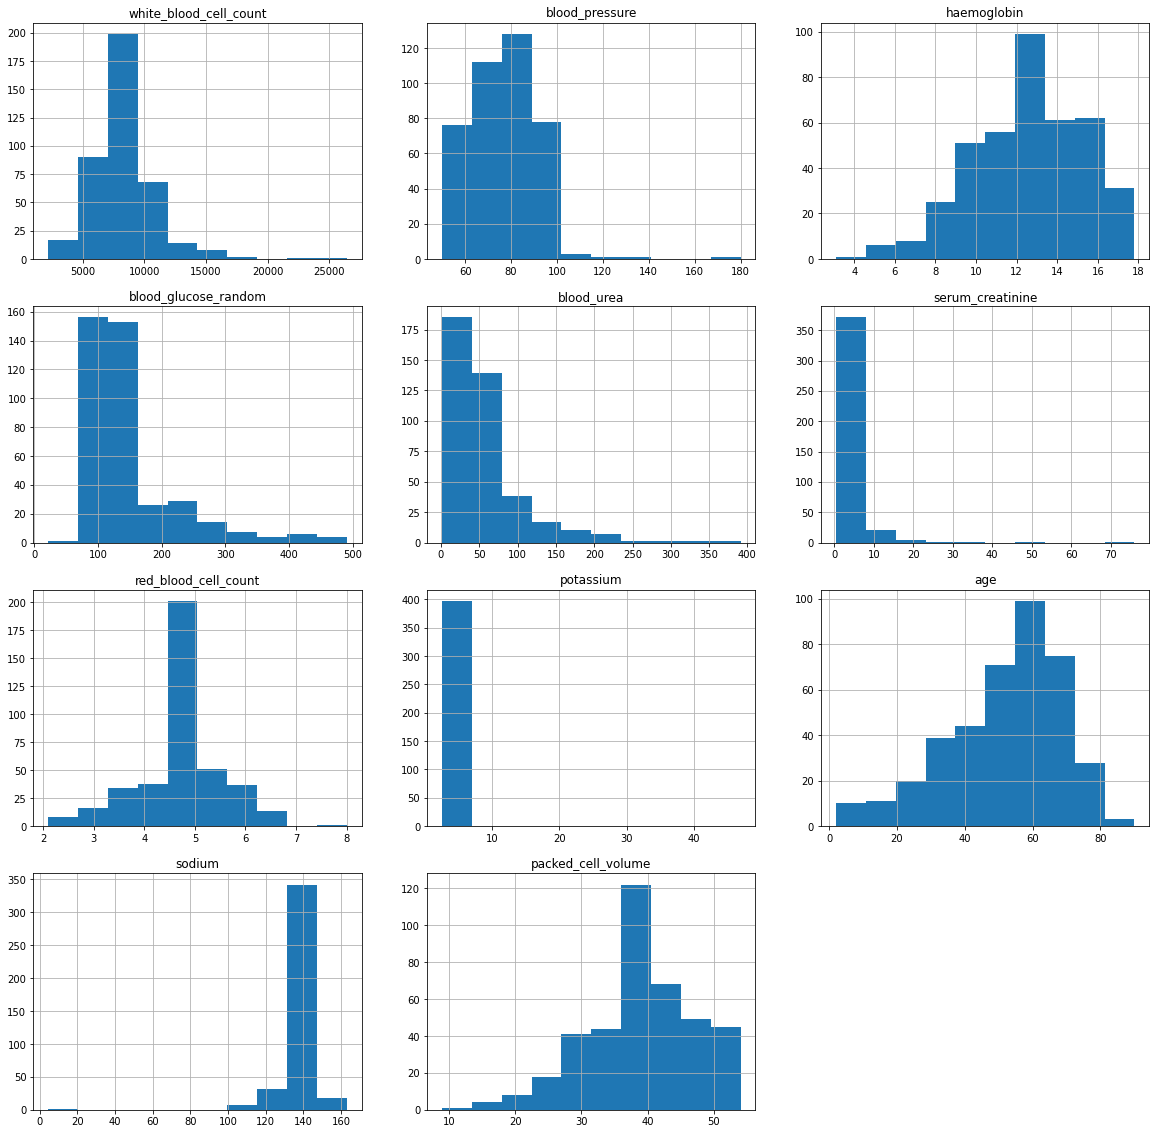

In [36]:
plt.figure(figsize=(20,20))
for i,feature in enumerate(continuous_columns):
    plt.subplot(4,3,i+1)      
    data[feature].hist()
    plt.title(feature)

## Analysing distribution of categorial columns


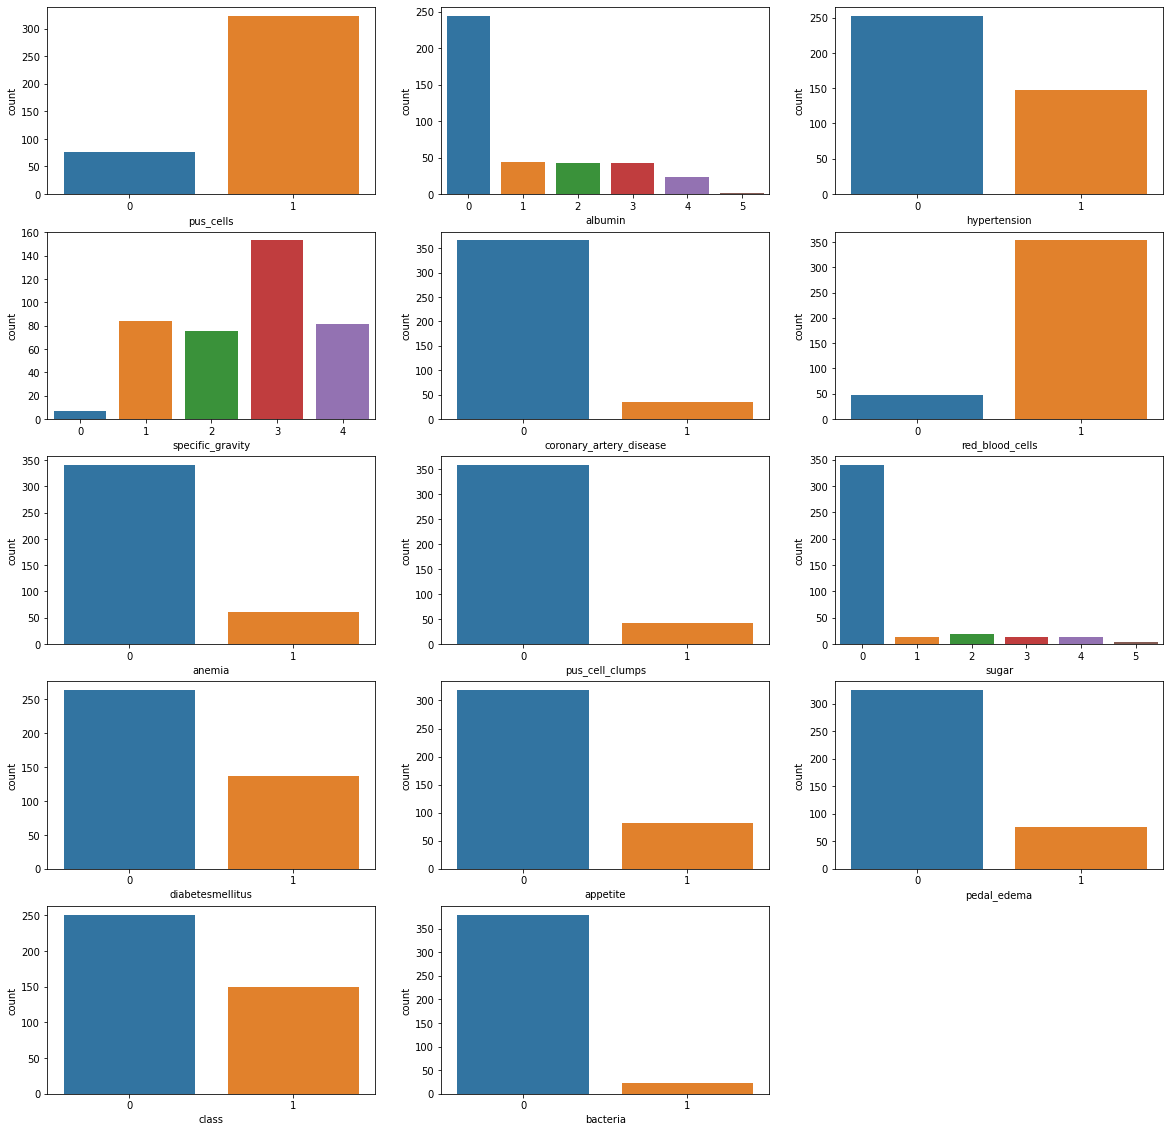

In [37]:
plt.figure(figsize=(20,20))

for i,feature in enumerate(categorical_columns):
    plt.subplot(5,3,i+1)
    sns.countplot(data[feature])

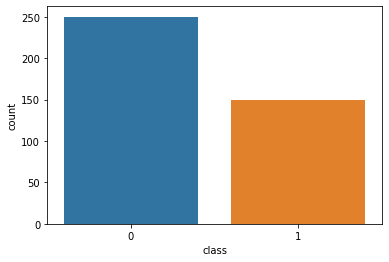

In [38]:
sns.countplot(data['class'])

## Correlation

In [39]:
data.corr()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cells,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
age,1.000000,0.146830,-0.161959,0.087907,0.185221,-0.019305,-0.102595,0.154774,0.040733,0.213779,...,-0.217882,0.099872,-0.202618,0.396749,0.364892,0.228872,0.154683,0.095099,0.056215,-0.230926
blood_pressure,0.146830,1.000000,-0.164422,0.122541,0.190218,-0.151369,-0.156856,0.059560,0.112173,0.149100,...,-0.292714,0.026067,-0.220822,0.270447,0.228250,0.086618,0.177601,0.054083,0.194962,-0.290600
specific_gravity,-0.161959,-0.164422,1.000000,-0.479962,-0.292053,0.253894,0.365353,-0.306426,-0.231704,-0.317893,...,0.501064,-0.206884,0.443741,-0.323643,-0.351016,-0.135814,-0.230975,-0.253803,-0.184155,0.659504
albumin,0.087907,0.122541,-0.479962,1.000000,0.287751,-0.394844,-0.561713,0.417868,0.377935,0.310481,...,-0.475165,0.207303,-0.411122,0.406057,0.308101,0.200957,0.303145,0.411080,0.229556,-0.531562
sugar,0.185221,0.190218,-0.292053,0.287751,1.000000,-0.092940,-0.190062,0.168091,0.119399,0.629809,...,-0.181518,0.159034,-0.163871,0.254268,0.430514,0.229301,0.069216,0.116442,0.042464,-0.294555
red_blood_cells,-0.019305,-0.151369,0.253894,-0.394844,-0.092940,1.000000,0.377394,-0.102948,-0.184402,-0.153076,...,0.280958,-0.002207,0.202455,-0.140538,-0.145646,-0.111493,-0.160868,-0.199285,-0.107625,0.282642
pus_cells,-0.102595,-0.156856,0.365353,-0.561713,-0.190062,0.377394,1.000000,-0.520118,-0.330401,-0.262259,...,0.418580,-0.107886,0.383240,-0.291719,-0.201032,-0.172295,-0.274985,-0.350227,-0.260566,0.375154
pus_cell_clumps,0.154774,0.059560,-0.306426,0.417868,0.168091,-0.102948,-0.520118,1.000000,0.275082,0.197593,...,-0.294242,0.163456,-0.267982,0.195623,0.165236,0.188029,0.189688,0.104356,0.175861,-0.265313
bacteria,0.040733,0.112173,-0.231704,0.377935,0.119399,-0.184402,-0.330401,0.275082,1.000000,0.085940,...,-0.189822,0.103546,-0.192222,0.089046,0.080070,0.162395,0.149126,0.134732,0.052208,-0.186871
blood_glucose_random,0.213779,0.149100,-0.317893,0.310481,0.629809,-0.153076,-0.262259,0.197593,0.085940,1.000000,...,-0.267580,0.121371,-0.222568,0.369849,0.500618,0.212433,0.176132,0.101502,0.126854,-0.401374


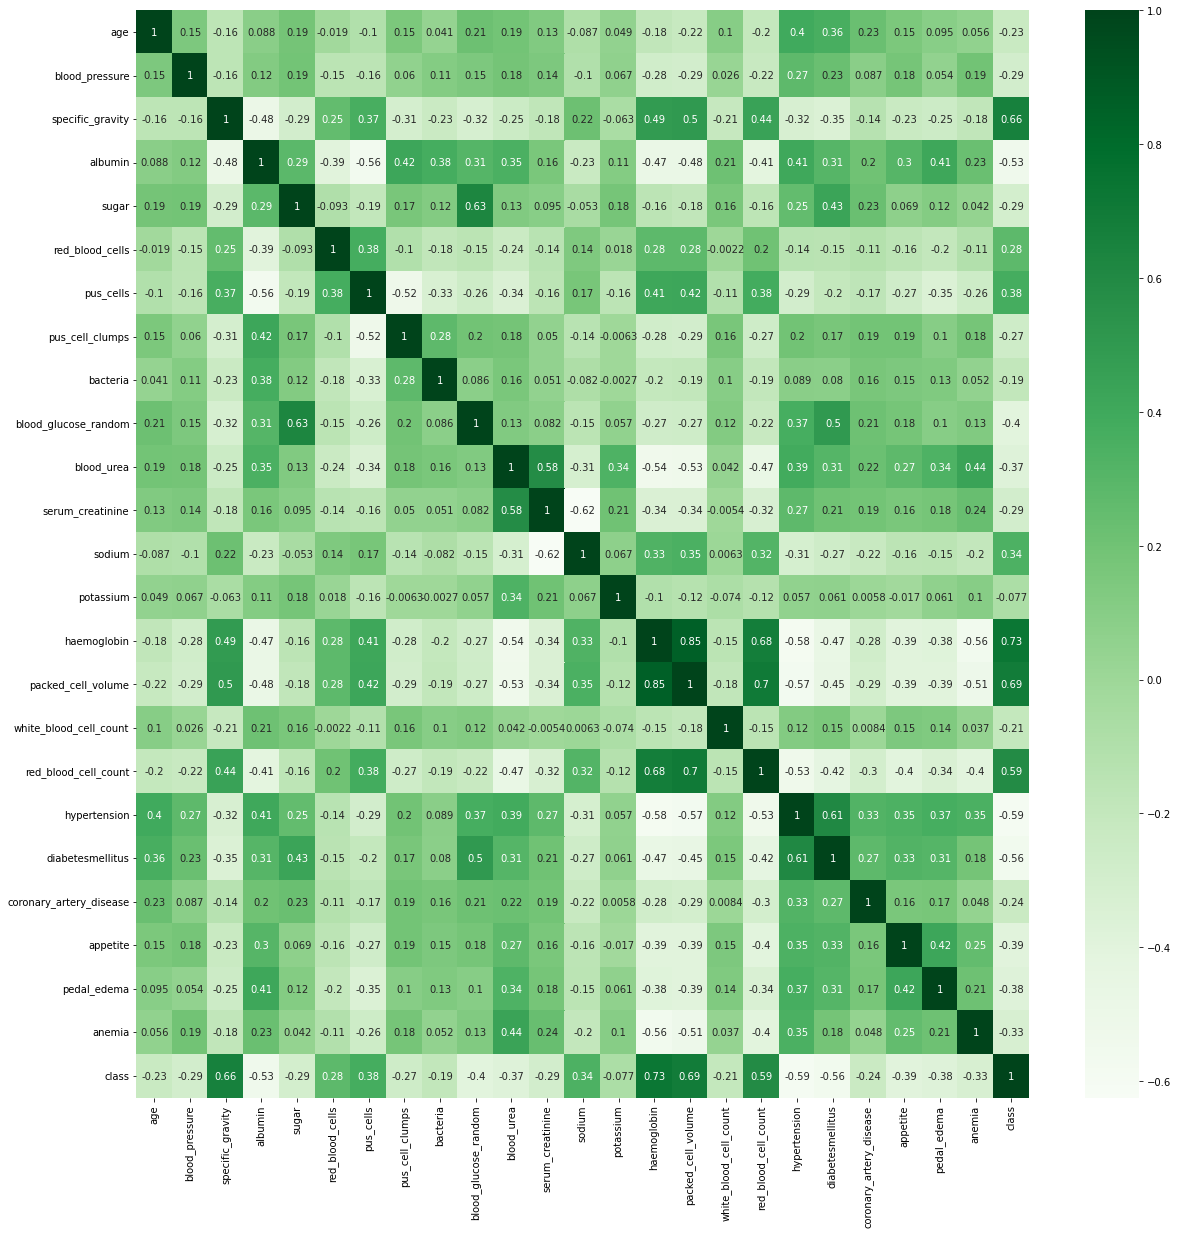

In [40]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),cmap="Greens",annot=True)

## Null values

In [41]:
data.isnull().any()

age                        False
blood_pressure             False
specific_gravity           False
albumin                    False
sugar                      False
red_blood_cells            False
pus_cells                  False
pus_cell_clumps            False
bacteria                   False
blood_glucose_random       False
blood_urea                 False
serum_creatinine           False
sodium                     False
potassium                  False
haemoglobin                False
packed_cell_volume         False
white_blood_cell_count     False
red_blood_cell_count       False
hypertension               False
diabetesmellitus           False
coronary_artery_disease    False
appetite                   False
pedal_edema                False
anemia                     False
class                      False
dtype: bool

In [42]:
data.isnull().sum() 

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cells                  0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetesmellitus           0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

In [15]:
data.packed_cell_volume=pd.to_numeric(data.packed_cell_volume,errors='coerce')
data.white_blood_cell_count=pd.to_numeric(data.white_blood_cell_count,errors='coerce')
data.red_blood_cell_count=pd.to_numeric(data.red_blood_cell_count,errors='coerce')


## Handling continuous/numeric columns null values

In [16]:
data['blood_glucose_random'].fillna(data['blood_glucose_random'].mean(),inplace=True)
data['blood_pressure'].fillna(data['blood_pressure'].mean(),inplace=True)
data['blood_urea'].fillna(data['blood_urea'].mean(),inplace=True)
data['haemoglobin'].fillna(data['haemoglobin'].mean(),inplace=True)
data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean(),inplace=True)
data['potassium'].fillna(data['potassium'].mean(),inplace=True)
data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mean(),inplace=True)
data['serum_creatinine'].fillna(data['serum_creatinine'].mean(),inplace=True)
data['sodium'].fillna(data['sodium'].mean(),inplace=True)
data['white_blood_cell_count'].fillna(data['white_blood_cell_count'].mean(),inplace=True)


## Handling continuous columns null values

In [17]:
data['age'].fillna(data['age'].mode()[0],inplace=True)
data['hypertension'].fillna(data['hypertension'].mode()[0],inplace=True)
data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0],inplace=True)
data['appetite'].fillna(data['appetite'].mode()[0],inplace=True)
data['albumin'].fillna(data['albumin'].mode()[0],inplace=True)
data['pus_cells'].fillna(data['pus_cells'].mode()[0],inplace=True)
data['red_blood_cells'].fillna(data['red_blood_cells'].mode()[0],inplace=True)
data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode()[0],inplace=True)
data['bacteria'].fillna(data['bacteria'].mode()[0],inplace=True)
data['anemia'].fillna(data['anemia'].mode()[0],inplace=True)
data['sugar'].fillna(data['sugar'].mode()[0],inplace=True)
data['diabetesmellitus'].fillna(data['diabetesmellitus'].mode()[0],inplace=True)
data['pedal_edema'].fillna(data['pedal_edema'].mode()[0],inplace=True)
data['specific_gravity'].fillna(data['specific_gravity'].mode()[0],inplace=True)

## Checking if there are any null values after resolving it

In [18]:
data.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cells                  0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetesmellitus           0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

## Label encoding

In [19]:

for i in categorical_columns:
    print("LABEL ENCODING OF:",i)
    Le=LabelEncoder()
    print(c(data[i]))
    data[i]=Le.fit_transform(data[i])
    print(c(data[i]))
    print("*"*100)

LABEL ENCODING OF: pus_cells
Counter({'normal': 324, 'abnormal': 76})
Counter({1: 324, 0: 76})
****************************************************************************************************
LABEL ENCODING OF: albumin
Counter({0.0: 245, 1.0: 44, 2.0: 43, 3.0: 43, 4.0: 24, 5.0: 1})
Counter({0: 245, 1: 44, 2: 43, 3: 43, 4: 24, 5: 1})
****************************************************************************************************
LABEL ENCODING OF: hypertension
Counter({'no': 253, 'yes': 147})
Counter({0: 253, 1: 147})
****************************************************************************************************
LABEL ENCODING OF: specific_gravity
Counter({1.02: 153, 1.01: 84, 1.025: 81, 1.015: 75, 1.005: 7})
Counter({3: 153, 1: 84, 4: 81, 2: 75, 0: 7})
****************************************************************************************************
LABEL ENCODING OF: coronary_artery_disease
Counter({'no': 366, 'yes': 34})
Counter({0: 366, 1: 34})
***********************

## Creating dependent and independent variables

In [20]:
selected_columns=['red_blood_cells','pus_cells','blood_glucose_random','blood_urea','pedal_edema','anemia',
                  'diabetesmellitus','coronary_artery_disease']
x=pd.DataFrame(data,columns=selected_columns)
y=pd.DataFrame(data,columns=['class'])
print(x.shape)
print(y.shape)

(400, 8)
(400, 1)
